In [42]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import itertools

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from unbalanced_dataset import UnderSampler, OverSampler, SMOTE

# Save a nice dark grey as a variable
almost_black = '#262626'

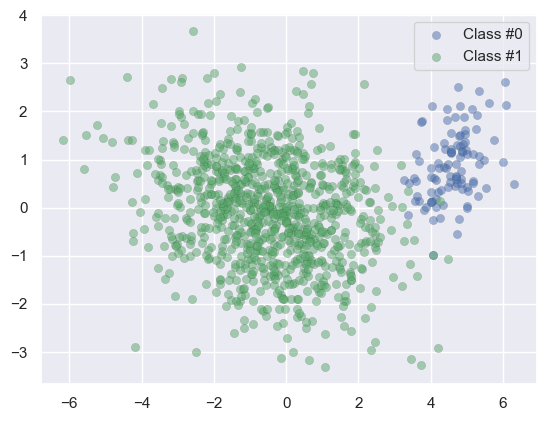

In [43]:
# Generate some data
x, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(x)

# Plot the original data
# Plot the two classes
palette = sns.color_palette()
plt.scatter(x_vis[y==0, 0], x_vis[y==0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(x_vis[y==1, 0], x_vis[y==1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()

##### Under-sampling:

The different under-sampling methods will be applied and a new dataset will be generated for each of them.

In [44]:
# Generate the new dataset using under-sampling method
verbose = False
# 'Random under-sampling'
US = UnderSampler(verbose=verbose)
usx, usy = US.fit_transform(x, y)


# Apply PCA to be able to visualise the results
usx_vis = pca.transform(usx)




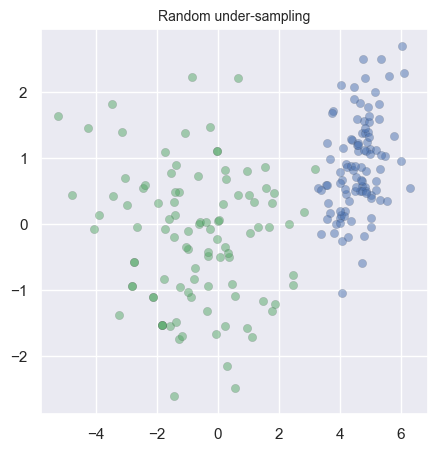

In [45]:
# Initialise the figure
palette = sns.color_palette()
fs = 10 # fontsize
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

# Random under-sampling
axes.scatter(usx_vis[usy==0, 0], usx_vis[usy==0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes.scatter(usx_vis[usy==1, 0], usx_vis[usy==1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes.set_title('Random under-sampling', fontsize=fs)


plt.show()

##### Over-sampling

In [48]:
# Generate the new dataset using under-sampling method
verbose = False
ratio = float(np.count_nonzero(y==1)) / float(np.count_nonzero(y==0))
# 'Random over-sampling'
OS = OverSampler(ratio=ratio, verbose=verbose)
osx, osy = OS.fit_transform(x, y)
# 'SMOTE'
smote = SMOTE(ratio=ratio, verbose=verbose)
smox, smoy = smote.fit_transform(x, y)
# 'SMOTE bordeline 1'
#bsmote1 = bSMOTE1(ratio=ratio, verbose=verbose)
#bs1x, bs1y = bsmote1.fit_transform(x, y)
# 'SMOTE bordeline 2'
#bsmote2 = bSMOTE2(ratio=ratio, verbose=verbose)
#bs2x, bs2y = bsmote2.fit_transform(x, y)





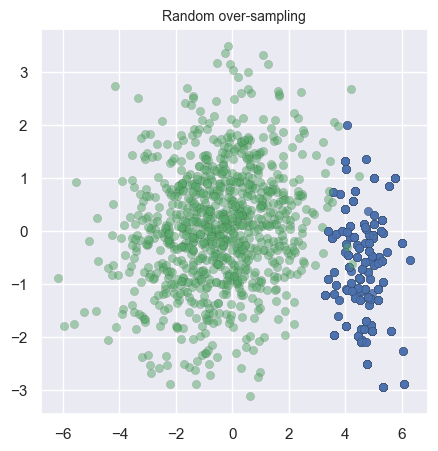

In [49]:
# Initialise the figure
palette = sns.color_palette()
fs = 10 # fontsize
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

# Random over-sampling
axes.scatter(osx_vis[osy==0, 0], osx_vis[osy==0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes.scatter(osx_vis[osy==1, 0], osx_vis[osy==1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes.set_title('Random over-sampling', fontsize=fs)


plt.show()

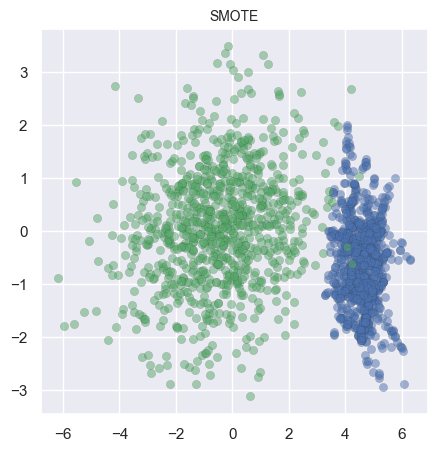

In [41]:
# SMOTE
# Initialise the figure
palette = sns.color_palette()
fs = 10 # fontsize
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
axes.scatter(smox_vis[smoy==0, 0], smox_vis[smoy==0, 1], label="Class #0", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
axes.scatter(smox_vis[smoy==1, 0], smox_vis[smoy==1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes.set_title('SMOTE', fontsize=fs)
plt.show()